Modeling the brusselator

In [71]:
import numpy as np
from scipy.fft import fftn, ifftn
%matplotlib inline

Brusselator:

$$\dot u = \triangle u +a - (b+1)u + u^2v$$
$$ \dot v = \triangle v + bu - u^2v$$
or in other words

$$\dot u = \triangle u f_u$$
$$ \dot v = \triangle v +f_v$$
This is in 2D. With random initial data. Do I need to worry about initial conditions? No!
I also want to be able to add a new function and a parameter

In [72]:
N = 64
dt = 0.001
fu = lambda a,b,u,v: a + (u**2)*v - (b+1)*u
fv = lambda a,b,u,v: b*u-(u**2)*v
L = 2*np.pi
NUM_STEPS = 1000
a = 1
b = 3
D0 = 1 
D1 = 0.1
# put only things I want to change
# don't want to change diffusion too much. At least for now.



In [99]:
def create_initial_array(num_of_nodes = N, ampl = 0.1):
    #return initial concentration of substance. Can be random, should be positive
    return np.random.rand(num_of_nodes,num_of_nodes) * ampl
# for now
def create_wavenumber_array(num_modes=N, L = L):
    # create array for wavenumbers in scipy format.
    num_modes = num_modes - num_modes%2 # make num of nodes even. Why?
    wavenum_array = np.zeros(num_modes)
    wavenum = 2*np.pi/L
    p1 = np.array([(wavenum * i) for i in range(int(num_modes/2))])
    
    p2 = np.array([wavenum * (-num_modes+n) for n in range(int(num_modes/2), num_modes)])
    wavenum_array = np.concatenate((p1,p2))
    return wavenum_array
def create_time_operator(wavenums, diffusion_coeff, timestep = dt):
    ## create a time evolution operator
    num_nodes = wavenums.size
    operator = np.empty((num_nodes,num_nodes))
    wavenums = wavenums**2
    # for i in range(num_nodes):
    #     for j in range(num_nodes):
    #         wavenumber = -(wavenums[i]**2+wavenums[j]**2)
    #         operator[i,j] = np.exp(timestep*diffusion_coeff*wavenumber)
    wavenums_sq = wavenums[:, np.newaxis]+wavenums
    operator = np.exp(-wavenums_sq*timestep*diffusion_coeff)
    
    return operator

In [104]:
# create_time_operator(create_wavenumber_array(5), D0)

In [75]:
def perform_simulation(a=a,b=b, timestep = dt, fu = fu, fv = fv, N = N, NUM_STEPS=NUM_STEPS):
    
    # initialize data
    initial_data_u = create_initial_array(N)
    initial_data_v = create_initial_array(N)
    wavenums = create_wavenumber_array(N, L=L)
    ## initialize operators
    operator_u = create_time_operator(wavenums, D0, timestep)
    operator_v = create_time_operator(wavenums, D1, timestep)
    
    ##initialize returned data
    time = np.empty(NUM_STEPS)
    time[0] = 0
    shape = time.shape+initial_data_u.shape
    conc_u = np.empty(shape)
    conc_v = np.empty(shape)
    conc_u[0] = initial_data_u
    conc_v[0] = initial_data_v

    ## begin calculations
    for i in range(NUM_STEPS-1):
        # initialize

        u = conc_u[i]
        v = conc_v[i]
        ## apply euler scheme
        nonlin_u = u + fu(a,b,u,v)*dt
        nonlin_v = v + fv(a,b,u,v)*dt
        ## use Fourier transform
        ## NOTES: I could combine u and v into complex array.
        fft_u = fftn(nonlin_u)
        fft_v = fftn(nonlin_v)

        ## perform timestep in fourier domain
        fft_u = fft_u * operator_u
        fft_v = fft_v * operator_v

        ## go back
        u = ifftn(fft_u).real
        v = ifftn(fft_v).real

        ## record the data
        time[i+1] = time[i] + timestep
        conc_u[i+1] = u
        conc_v[i+1] = v

    return time, conc_u, conc_v


In [76]:
def perform__trunc_simulation(a=a,b=b, L=L,timestep = dt, D0=D0, D1 = D1,fu = fu, fv = fv, N = N, NUM_STEPS=NUM_STEPS, savetimes = [0, NUM_STEPS//2, NUM_STEPS-2]):
    
    # initialize data
    initial_data_u = create_initial_array(N)
    initial_data_v = create_initial_array(N)
    wavenums = create_wavenumber_array(N, L=L)

    ## initialize operators
    operator_u = create_time_operator(wavenums, D0, timestep)
    operator_v = create_time_operator(wavenums, D1, timestep)
    
    ##initialize data
    u = initial_data_u
    v = initial_data_v

    ## initialize saved data
    # shape = savetimes.shape+initial_data_u.shape
    u_saved = []
    v_saved = []
    ## begin calculations
    for i in range(NUM_STEPS-1):
        ## checking progress
        progress = float(i/NUM_STEPS)
        print(f"{progress}")
        # initialize saving date
        if i in savetimes:
            u_saved.append(u)
            v_saved.append(v)
        ## apply euler scheme
        nonlin_u = u + fu(a,b,u,v)*dt
        nonlin_v = v + fv(a,b,u,v)*dt
        ## use Fourier transform
        ## NOTES: I could combine u and v into complex array.
        fft_u = fftn(nonlin_u)
        fft_v = fftn(nonlin_v)

        ## perform timestep in fourier domain
        fft_u = fft_u * operator_u
        fft_v = fft_v * operator_v

        ## go back
        u = ifftn(fft_u).real
        v = ifftn(fft_v).real
    return u_saved, v_saved, savetimes


In [77]:
# perform_simulation(NUM_STEPS= 10)

0.0
0.0001
0.0002
0.0003
0.0004
0.0005
0.0006
0.0007
0.0008
0.0009
0.001
0.0011
0.0012
0.0013
0.0014
0.0015
0.0016
0.0017
0.0018
0.0019
0.002
0.0021
0.0022
0.0023
0.0024
0.0025
0.0026
0.0027
0.0028
0.0029
0.003
0.0031
0.0032
0.0033
0.0034
0.0035
0.0036
0.0037
0.0038
0.0039
0.004
0.0041
0.0042
0.0043
0.0044
0.0045
0.0046
0.0047
0.0048
0.0049
0.005
0.0051
0.0052
0.0053
0.0054
0.0055
0.0056
0.0057
0.0058
0.0059
0.006
0.0061
0.0062
0.0063
0.0064
0.0065
0.0066
0.0067
0.0068
0.0069
0.007
0.0071
0.0072
0.0073
0.0074
0.0075
0.0076
0.0077
0.0078
0.0079
0.008
0.0081
0.0082
0.0083
0.0084
0.0085
0.0086
0.0087
0.0088
0.0089
0.009
0.0091
0.0092
0.0093
0.0094
0.0095
0.0096
0.0097
0.0098
0.0099
0.01
0.0101
0.0102
0.0103
0.0104
0.0105
0.0106
0.0107
0.0108
0.0109
0.011
0.0111
0.0112
0.0113
0.0114
0.0115
0.0116
0.0117
0.0118
0.0119
0.012
0.0121
0.0122
0.0123
0.0124
0.0125
0.0126
0.0127
0.0128
0.0129
0.013
0.0131
0.0132
0.0133
0.0134
0.0135
0.0136
0.0137
0.0138
0.0139
0.014
0.0141
0.0142
0.0143
0.0144
0.0

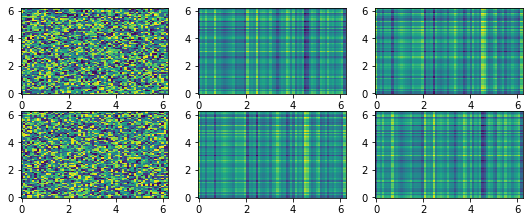

In [78]:
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
# Plot u(x,y) for different time points (2D)
## critical values
a=1.5
b=2.34
D0=2.8
D1 = 22.4
dt = 0.005
NUM_STEPS = 10**4

data_u, data_v, savetimes = perform__trunc_simulation(N = N,L=L,a=b, b=b, D1 =D1, D0=D0, NUM_STEPS=NUM_STEPS)
xs = np.arange(0.0,L,L/N)
ys = np.arange(0.0,L,L/N)
print(f"time = {dt*NUM_STEPS}")
X,Y = np.meshgrid(xs,ys)

from matplotlib import animation, rc
from IPython.display import HTML

fig = plt.figure(figsize=(9.0,3.5))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax1.pcolormesh(X, Y, data_u[0], shading='auto')
ax2.pcolormesh(X, Y, data_u[1], shading='auto')
ax3.pcolormesh(X, Y, data_u[2], shading='auto')
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

ax4.pcolormesh(X, Y, data_v[0], shading='auto')
ax5.pcolormesh(X, Y, data_v[1], shading='auto')
ax6.pcolormesh(X, Y, data_v[2], shading='auto')

plt.show()

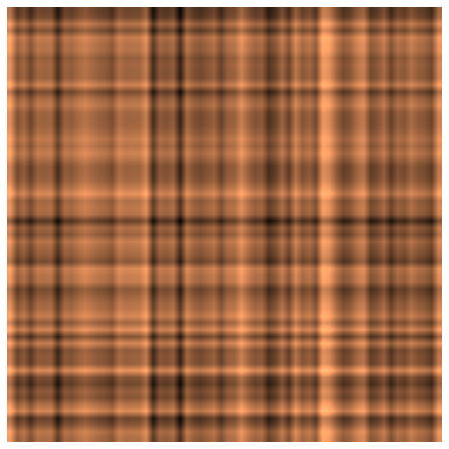

In [79]:
def show_patterns(U, ax=None):
    ax.imshow(U, cmap=plt.cm.copper,
              interpolation='bilinear',
              extent=[-1, 1, -1, 1])
    ax.set_axis_off()
U=data_u[2]
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
show_patterns(U, ax=ax)

What do I want from the simulation?
I want to be able to change the parameters rather easily. Or display a bunch of plots 
What parameters do I have?

def plot_simulation(a,b):
